#**Part C – Programming Task (Python / Jupyter Notebook)**

Implement A* search on a maze (given as a 2D matrix where 1=wall, 0=path, A=start, B=goal).

Use Manhattan distance as heuristic.

Visualize the path found.


*Modify the heuristic:*

Case 1: Multiply Manhattan distance by 1.5 (check if it is admissible).

Case 2: Define heuristic so that for one edge it violates consistency.


*For each case, run A* and record:

Path found

Cost of path

Whether the path is optimal

In [8]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

class MazeSolver:
    """
    An object-oriented approach to solving a maze using the A* search algorithm.
    This class is designed to test different heuristic functions.
    """
    def __init__(self, grid_layout):
        """
        Initializes the solver with a specific maze layout.
        """
        self.original_grid_layout = [list(row) for row in grid_layout]
        self.grid = [list(row) for row in grid_layout]
        self.rows = len(self.grid)
        self.cols = len(self.grid[0])
        self.start_pos = None
        self.goal_pos = None
        self._find_start_and_goal()

    def _find_start_and_goal(self):
        """
        Parses the grid to locate the start ('A') and goal ('B') positions.
        """
        for r in range(self.rows):
            for c in range(self.cols):
                if self.grid[r][c] == 'A':
                    self.start_pos = (r, c)
                    self.grid[r][c] = 0
                elif self.grid[r][c] == 'B':
                    self.goal_pos = (r, c)
                    self.grid[r][c] = 0

    @staticmethod
    def _heuristic_manhattan(pos1, pos2):
        return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

    @staticmethod
    def _heuristic_inadmissible(pos1, pos2):
        return (abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])) * 1.5

    def _heuristic_inconsistent(self, pos1, pos2):
        # This heuristic is tailored to the specific maze to demonstrate inconsistency
        # It creates a "dip" near the goal or along a path.
        # Check if goal is at least 2 cells away to avoid index out of bounds
        if self.goal_pos[0] > 1 and self.goal_pos[1] > 1:
            inconsistent_node_1 = (self.goal_pos[0] - 1, self.goal_pos[1] - 1)
            inconsistent_node_2 = (self.goal_pos[0] - 2, self.goal_pos[1] - 1)
            # if a node is near the goal, give it a weird value
            if pos1 == inconsistent_node_1: return 5
            if pos1 == inconsistent_node_2: return 1

        return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

    def _reconstruct_path(self, predecessors, current):
        total_path = [current]
        while current in predecessors:
            current = predecessors[current]
            total_path.append(current)
        return total_path[::-1]

    def find_path(self, heuristic_choice='manhattan'):
        if not self.start_pos or not self.goal_pos:
            return None, float("inf")

        heuristic_map = {
            'manhattan': self._heuristic_manhattan,
            'inadmissible': self._heuristic_inadmissible,
            'inconsistent': self._heuristic_inconsistent
        }
        heuristic_func = heuristic_map.get(heuristic_choice)

        priority_queue = [(0, self.start_pos)]
        predecessors = {}
        cost_from_start = {self.start_pos: 0}
        estimated_total_cost = {self.start_pos: heuristic_func(self.start_pos, self.goal_pos)}

        while priority_queue:
            _, current_node = heapq.heappop(priority_queue)

            if current_node == self.goal_pos:
                path = self._reconstruct_path(predecessors, current_node)
                return path, cost_from_start[self.goal_pos]

            for move in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                row, col = current_node[0] + move[0], current_node[1] + move[1]
                adjacent_node = (row, col)

                if 0 <= row < self.rows and 0 <= col < self.cols and self.grid[row][col] == 0:
                    tentative_cost = cost_from_start[current_node] + 1

                    if adjacent_node not in cost_from_start or tentative_cost < cost_from_start[adjacent_node]:
                        predecessors[adjacent_node] = current_node
                        cost_from_start[adjacent_node] = tentative_cost
                        estimated_total_cost[adjacent_node] = tentative_cost + heuristic_func(adjacent_node, self.goal_pos)
                        heapq.heappush(priority_queue, (estimated_total_cost[adjacent_node], adjacent_node))

        return None, float("inf")

    def visualize(self, path, title):
        if not path:
            print("Cannot visualize an empty path.")
            return

        viz_grid = np.zeros((self.rows, self.cols))
        for r in range(self.rows):
            for c in range(self.cols):
                if self.original_grid_layout[r][c] == 1:
                    viz_grid[r][c] = 1 # Wall
                elif (r,c) in path:
                     viz_grid[r][c] = 2 # Path

        plt.figure(figsize=(self.cols*0.8, self.rows*0.8))
        plt.imshow(viz_grid, cmap="plasma")
        plt.title(title)

        plt.plot(self.start_pos[1], self.start_pos[0], 'go', markersize=15, label="Start")
        plt.plot(self.goal_pos[1], self.goal_pos[0], 'rx', markersize=15, mew=3, label="Goal")
        plt.legend()
        plt.show()

print("Part 1: MazeSolver class defined successfully.")

Part 1: MazeSolver class defined successfully.


**5x5 Maze Experiment**

Here, we define a small 5x5 maze and run all three heuristic experiments on it.


MAZE EXPERIMENT: 5x5 GRID

--- 5x5 Case 0: Standard A* with Manhattan Distance ---
Path found: [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4)]
Cost of path: 5
Whether the path is optimal: Yes


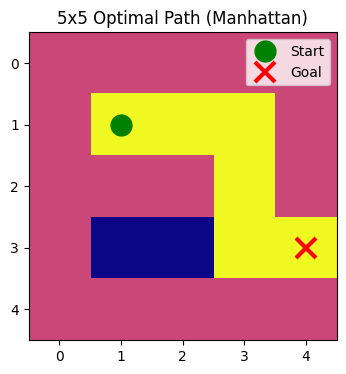


--- 5x5 Case 1: Inadmissible Heuristic (Manhattan * 1.5) ---
Path found: [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4)]
Cost of path: 5
Whether the path is optimal: Yes


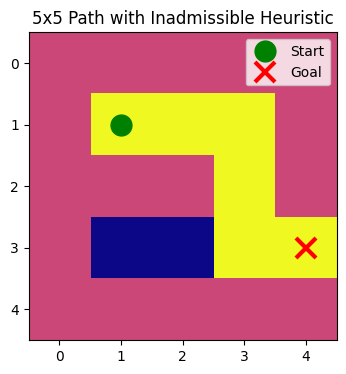


--- 5x5 Case 2: Inconsistent Heuristic ---
Path found: [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4)]
Cost of path: 5
Whether the path is optimal: Yes


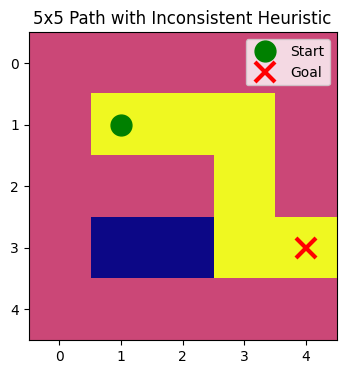

In [9]:
maze_5x5 = [
    [1, 1, 1, 1, 1],
    [1, 'A', 0, 0, 1],
    [1, 1, 1, 0, 1],
    [1, 0, 0, 0, 'B'],
    [1, 1, 1, 1, 1]
]

print("\n" + "="*60)
print("MAZE EXPERIMENT: 5x5 GRID")
print("="*60)

solver_5x5 = MazeSolver(maze_5x5)
optimal_cost_5x5 = -1

# Case 1: Manhattan
print("\n--- 5x5 Case 0: Standard A* with Manhattan Distance ---")
path, cost = solver_5x5.find_path('manhattan')
if path:
    optimal_cost_5x5 = cost
    print(f"Path found: {path}")
    print(f"Cost of path: {cost}")
    print("Whether the path is optimal: Yes")
    solver_5x5.visualize(path, "5x5 Optimal Path (Manhattan)")

# Case 2: Inadmissible
print("\n--- 5x5 Case 1: Inadmissible Heuristic (Manhattan * 1.5) ---")
path, cost = solver_5x5.find_path('inadmissible')
if path:
    is_optimal_str = 'Yes' if cost == optimal_cost_5x5 else 'No'
    print(f"Path found: {path}")
    print(f"Cost of path: {cost}")
    print(f"Whether the path is optimal: {is_optimal_str}")
    solver_5x5.visualize(path, "5x5 Path with Inadmissible Heuristic")

# Case 3: Inconsistent
print("\n--- 5x5 Case 2: Inconsistent Heuristic ---")
path, cost = solver_5x5.find_path('inconsistent')
if path:
    is_optimal_str = 'Yes' if cost == optimal_cost_5x5 else 'No'
    print(f"Path found: {path}")
    print(f"Cost of path: {cost}")
    print(f"Whether the path is optimal: {is_optimal_str}")
    solver_5x5.visualize(path, "5x5 Path with Inconsistent Heuristic")


**8x8 Maze Experiment**

This cell runs the same three experiments on a more complex 8x8 maze.


MAZE EXPERIMENT: 8x8 GRID

--- 8x8 Case 0: Standard A* with Manhattan Distance ---
Path found: [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 2), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 6)]
Cost of path: 14
Whether the path is optimal: Yes


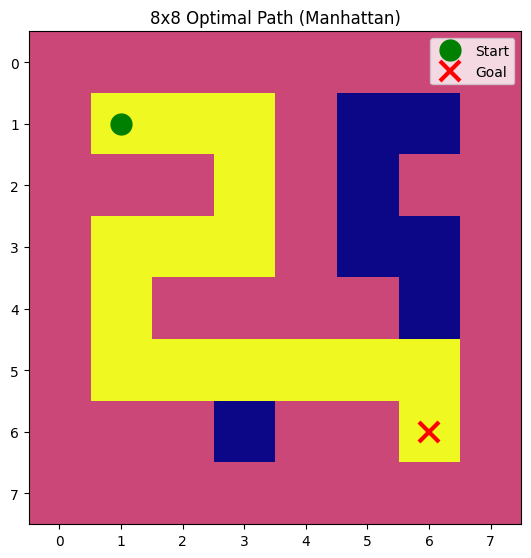


--- 8x8 Case 1: Inadmissible Heuristic (Manhattan * 1.5) ---
Path found: [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 2), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 6)]
Cost of path: 14
Whether the path is optimal: Yes


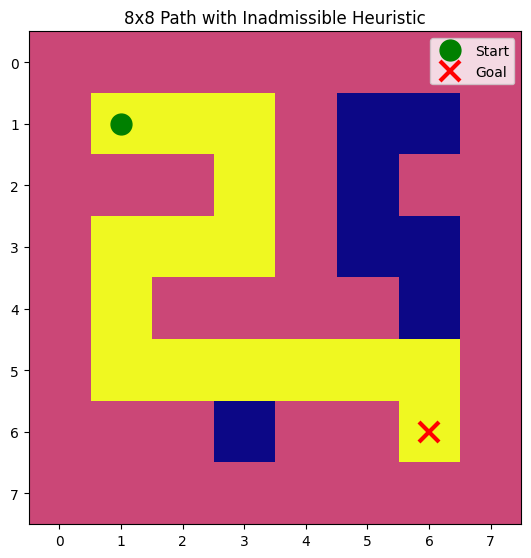


--- 8x8 Case 2: Inconsistent Heuristic ---
Path found: [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 2), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 6)]
Cost of path: 14
Whether the path is optimal: Yes


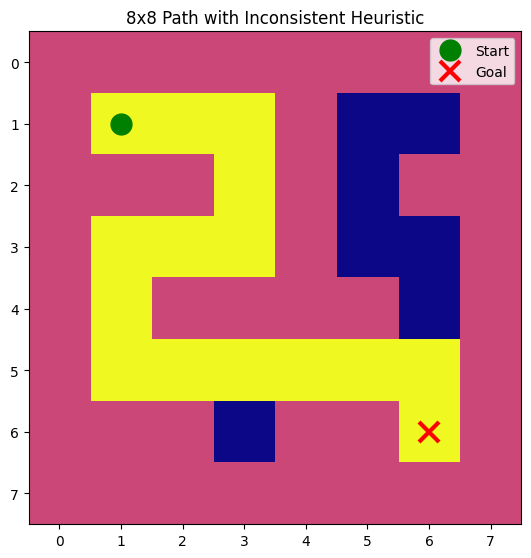

In [10]:
maze_8x8 = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 'A', 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 1, 'B', 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
]

print("\n" + "="*60)
print("MAZE EXPERIMENT: 8x8 GRID")
print("="*60)

solver_8x8 = MazeSolver(maze_8x8)
optimal_cost_8x8 = -1

# Case 1: Manhattan
print("\n--- 8x8 Case 0: Standard A* with Manhattan Distance ---")
path, cost = solver_8x8.find_path('manhattan')
if path:
    optimal_cost_8x8 = cost
    print(f"Path found: {path}")
    print(f"Cost of path: {cost}")
    print("Whether the path is optimal: Yes")
    solver_8x8.visualize(path, "8x8 Optimal Path (Manhattan)")

# Case 2: Inadmissible
print("\n--- 8x8 Case 1: Inadmissible Heuristic (Manhattan * 1.5) ---")
path, cost = solver_8x8.find_path('inadmissible')
if path:
    is_optimal_str = 'Yes' if cost == optimal_cost_8x8 else 'No'
    print(f"Path found: {path}")
    print(f"Cost of path: {cost}")
    print(f"Whether the path is optimal: {is_optimal_str}")
    solver_8x8.visualize(path, "8x8 Path with Inadmissible Heuristic")

# Case 3: Inconsistent
print("\n--- 8x8 Case 2: Inconsistent Heuristic ---")
path, cost = solver_8x8.find_path('inconsistent')
if path:
    is_optimal_str = 'Yes' if cost == optimal_cost_8x8 else 'No'
    print(f"Path found: {path}")
    print(f"Cost of path: {cost}")
    print(f"Whether the path is optimal: {is_optimal_str}")
    solver_8x8.visualize(path, "8x8 Path with Inconsistent Heuristic")


**10x10 Maze Experiment**

Finally, this cell runs the experiments on a larger 10x10 maze.


MAZE EXPERIMENT: 10x10 GRID

--- 10x10 Case 0: Standard A* with Manhattan Distance ---
Path found: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (7, 5), (6, 5), (6, 6), (6, 7), (6, 8), (7, 8), (8, 8)]
Cost of path: 18
Whether the path is optimal: Yes


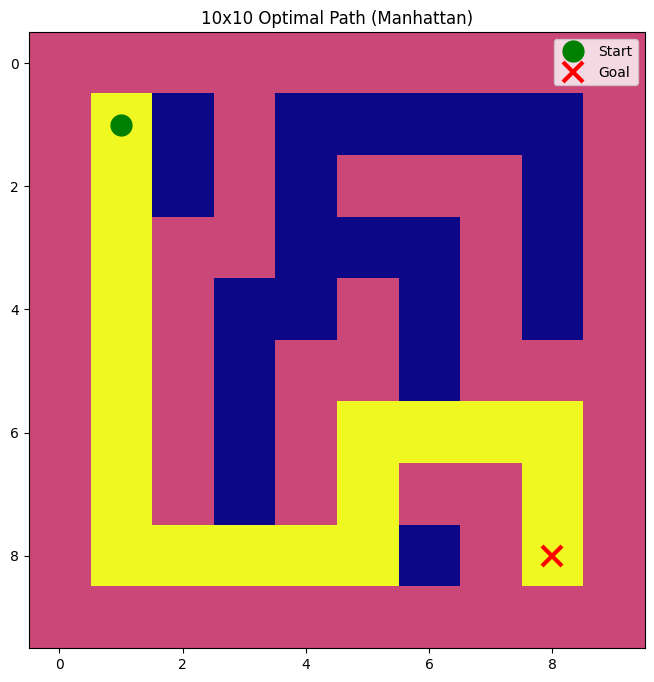


--- 10x10 Case 1: Inadmissible Heuristic (Manhattan * 1.5) ---
Path found: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (7, 5), (6, 5), (6, 6), (6, 7), (6, 8), (7, 8), (8, 8)]
Cost of path: 18
Whether the path is optimal: Yes


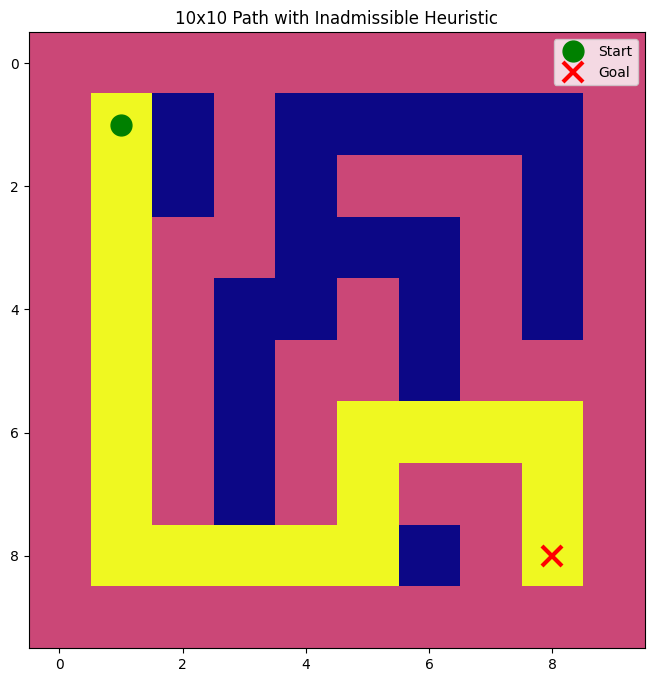


--- 10x10 Case 2: Inconsistent Heuristic ---
Path found: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (7, 5), (6, 5), (6, 6), (6, 7), (6, 8), (7, 8), (8, 8)]
Cost of path: 18
Whether the path is optimal: Yes


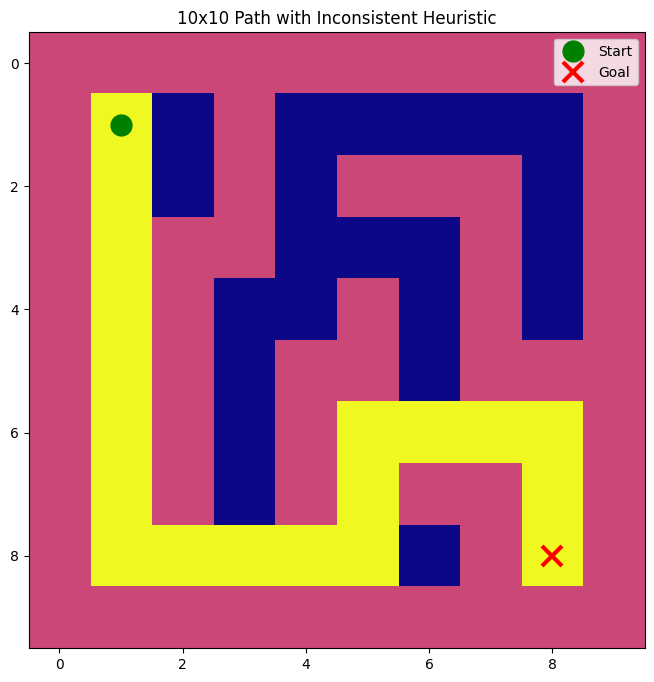

In [11]:
maze_10x10 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 'A', 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
    [1, 0, 1, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 'B', 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

print("\n" + "="*60)
print("MAZE EXPERIMENT: 10x10 GRID")
print("="*60)

solver_10x10 = MazeSolver(maze_10x10)
optimal_cost_10x10 = -1

# Case 1: Manhattan
print("\n--- 10x10 Case 0: Standard A* with Manhattan Distance ---")
path, cost = solver_10x10.find_path('manhattan')
if path:
    optimal_cost_10x10 = cost
    print(f"Path found: {path}")
    print(f"Cost of path: {cost}")
    print("Whether the path is optimal: Yes")
    solver_10x10.visualize(path, "10x10 Optimal Path (Manhattan)")

# Case 2: Inadmissible
print("\n--- 10x10 Case 1: Inadmissible Heuristic (Manhattan * 1.5) ---")
path, cost = solver_10x10.find_path('inadmissible')
if path:
    is_optimal_str = 'Yes' if cost == optimal_cost_10x10 else 'No'
    print(f"Path found: {path}")
    print(f"Cost of path: {cost}")
    print(f"Whether the path is optimal: {is_optimal_str}")
    solver_10x10.visualize(path, "10x10 Path with Inadmissible Heuristic")

# Case 3: Inconsistent
print("\n--- 10x10 Case 2: Inconsistent Heuristic ---")
path, cost = solver_10x10.find_path('inconsistent')
if path:
    is_optimal_str = 'Yes' if cost == optimal_cost_10x10 else 'No'
    print(f"Path found: {path}")
    print(f"Cost of path: {cost}")
    print(f"Whether the path is optimal: {is_optimal_str}")
    solver_10x10.visualize(path, "10x10 Path with Inconsistent Heuristic")
